## data description and links
### https://www.kaggle.com/c/prudential-life-insurance-assessment/data
### https://www.kaggle.com/zeroblue/prudential-life-insurance-assessment/xgboost-with-optimized-offsets
### https://www.kaggle.com/tdevries/prudential-life-insurance-assessment/neural-network-example
## look up Random Forest and XGBoost

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale=1.1)

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
print len(train), len(test)
train.head()

59381 19765


,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [3]:
test.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.columns

Index([u'Id', u'Product_Info_1', u'Product_Info_2', u'Product_Info_3',
       u'Product_Info_4', u'Product_Info_5', u'Product_Info_6',
       u'Product_Info_7', u'Ins_Age', u'Ht', 
       ...
       u'Medical_Keyword_40', u'Medical_Keyword_41', u'Medical_Keyword_42',
       u'Medical_Keyword_43', u'Medical_Keyword_44', u'Medical_Keyword_45',
       u'Medical_Keyword_46', u'Medical_Keyword_47', u'Medical_Keyword_48',
       u'Response'],
      dtype='object', length=128)

In [5]:
print train.Product_Info_1.unique() #categorical

[1 2]


In [6]:
print train.Product_Info_2.unique() #categorical

['D3' 'A1' 'E1' 'D4' 'D2' 'A8' 'A2' 'D1' 'A7' 'A6' 'A3' 'A5' 'C4' 'C1' 'B2'
 'C3' 'C2' 'A4' 'B1']


In [7]:
print train.Product_Info_3.unique() #numerical

[10 26 21 31 29 37 15 36  8  4 30 11 23 28 13  9  6 33 32  3 18  2 22 17 38
 19 34 12 24 20  1 16  5 27]


In [8]:
train.Product_Info_4.describe() #numerical, normalized

count    59381.000000
mean         0.328952
std          0.282562
min          0.000000
25%          0.076923
50%          0.230769
75%          0.487179
max          1.000000
Name: Product_Info_4, dtype: float64

In [9]:
print train.Product_Info_5.unique() #categorical
print train.Product_Info_6.unique() #categorical
print train.Product_Info_7.unique() #categorical

[2 3]
[1 3]
[1 3 2]


In [15]:
for c in train.columns:
    if c.startswith('Emp'):
        print train[c].describe()
        print 

count    59362.000000
mean         0.077582
std          0.082347
min          0.000000
25%          0.035000
50%          0.060000
75%          0.100000
max          1.000000
Name: Employment_Info_1, dtype: float64

count    59381.000000
mean         8.641821
std          4.227082
min          1.000000
25%          9.000000
50%          9.000000
75%          9.000000
max         38.000000
Name: Employment_Info_2, dtype: float64

count    59381.000000
mean         1.300904
std          0.715034
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: Employment_Info_3, dtype: float64

count    52602.000000
mean         0.006283
std          0.032816
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Employment_Info_4, dtype: float64

count    59381.000000
mean         2.142958
std          0.350033
min          2.000000
25%          2.000000
50%          2.000000


### numerical, normalized: Emp_1, Emp_4, Emp_6
### numerical: Emp_2
### categorical: Emp_3, Emp_5

In [23]:
train.Product_Info_3.describe() # looks like a sibling to Emp_2
                                # may even be categorical

count    59381.000000
mean        24.415655
std          5.072885
min          1.000000
25%         26.000000
50%         26.000000
75%         26.000000
max         38.000000
Name: Product_Info_3, dtype: float64

In [24]:
for c in train.columns:
    if c.startswith('Insured'):
        print train[c].describe()
        print 

count    59381.000000
mean         1.209326
std          0.417939
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: InsuredInfo_1, dtype: float64

count    59381.000000
mean         2.007427
std          0.085858
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: InsuredInfo_2, dtype: float64

count    59381.000000
mean         5.835840
std          2.674536
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: InsuredInfo_3, dtype: float64

count    59381.000000
mean         2.883666
std          0.320627
min          2.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: InsuredInfo_4, dtype: float64

count    59381.000000
mean         1.027180
std          0.231566
min          1.000000
25%          1.000000
50%          1.000000
75%          1.0

In [25]:
for c in train.columns:
    if c.startswith('Insured'):
        print c
        print train[c].unique()
        print 

InsuredInfo_1
[1 2 3]

InsuredInfo_2
[2 3]

InsuredInfo_3
[ 6  8  3  4  2  1 11  7  5 10  9]

InsuredInfo_4
[3 2]

InsuredInfo_5
[1 3]

InsuredInfo_6
[2 1]

InsuredInfo_7
[1 3]



### all insuredinfos are categorical variables (arguably)

In [65]:
for c in train.columns:
    if c.startswith('Insurance'):
        print c
        print train[c].unique()
        print 

Insurance_History_1
[1 2]

Insurance_History_2
[1 3 2]

Insurance_History_3
[3 1 2]

Insurance_History_4
[1 3 2]

Insurance_History_5
[ 0.00066667  0.00013333         nan ...,  0.00023414  0.00574     0.00137665]

Insurance_History_7
[1 3 2]

Insurance_History_8
[1 3 2]

Insurance_History_9
[2 3 1]



In [66]:
train.Insurance_History_5.describe()

count    33985.000000
mean         0.001733
std          0.007338
min          0.000000
25%          0.000400
50%          0.000973
75%          0.002000
max          1.000000
Name: Insurance_History_5, dtype: float64

In [26]:
for c in train.columns:
    if c.startswith('Fam'):
        print c
        print train[c].unique()
        print 

Family_Hist_1
[2 3 1]

Family_Hist_2
[        nan  0.1884058   0.30434783  0.42028985  0.46376812  0.5942029
  0.79710145  0.4057971   0.27536232  0.28985507  0.43478261  0.37681159
  0.60869565  0.39130435  0.73913043  0.71014493  0.55072464  0.26086957
  0.53623188  0.24637681  0.34782609  0.7826087   0.56521739  0.15942029
  0.62318841  0.69565217  0.52173913  0.47826087  0.68115942  0.76811594
  0.72463768  0.50724638  0.14492754  0.33333333  0.75362319  0.8115942
  0.66666667  0.36231884  0.57971014  0.63768116  0.17391304  0.49275362
  0.23188406  0.44927536  0.31884058  0.89855072  0.65217391  0.84057971
  0.13043478  0.2173913   0.20289855  0.08695652  1.          0.94202899
  0.82608696  0.91304348  0.10144928  0.88405797  0.85507246  0.04347826
  0.86956522  0.11594203  0.02898551  0.07246377  0.05797101  0.92753623
  0.97101449  0.          0.95652174]

Family_Hist_3
[ 0.59803922         nan  0.29411765  0.49019608  0.52941176  0.47058824
  0.54901961  0.57843137  0.34313725

### numerical, normalized: Fam 2-5
### categorical: Fam 1

In [27]:
for c in train.columns:
    if c.startswith('Medical_H'):
        print c
        print train[c].unique()
        print 

Medical_History_1
[   4.    5.   10.    0.   nan    6.    1.   39.   61.    8.    2.    3.
   22.   11.   19.    7.   16.   12.   49.    9.   13.   15.   47.   57.
   24.   23.   62.   28.   44.   32.   17.   18.   34.   30.  153.   21.
   86.   14.   25.   36.   42.   26.   20.   64.   29.   55.  124.   27.
  114.   40.   31.   41.   46.   76.   51.   65.   66.   78.  154.  147.
   37.   80.   71.   85.  105.   53.   56.   68.   52.   77.   33.   50.
   73.   35.   70.  182.   95.   43.   72.   84.   54.   48.   38.   45.
  112.  134.   88.   63.   69.  158.  120.   59.  100.  119.   74.   82.
   58.   97.   90.   96.  123.   94.  160.  156.  113.  176.   60.   75.
   91.   79.   81.  121.  103.   83.  240.  128.   93.  136.  122.   87.
   92.  110.  178.  175.  171.   89.   67.  169.   99.  229.  223.  109.
  146.  118.  141.  107.  104.  117.  130.  159.  172.  108.  191.  201.
   98.  161.  115.  173.  102.  106.  162.  150.  125.  179.  148.  132.
  116.  138.  126.  193.  101.  2

In [62]:
train.Medical_History_2.describe()

count    59381.000000
mean       253.987100
std        178.621154
min          1.000000
25%        112.000000
50%        162.000000
75%        418.000000
max        648.000000
Name: Medical_History_2, dtype: float64

### numerical: Med_H 1, Med_H 10, Med_H 15, Med_H 24, Med_H 32
### categorical: Med_H 2-9, Med_H 11-14, Med_H 16-23, Med_H 25-31, Med_H 33-41

In [28]:
for c in train.columns:
    if c.startswith('Medical_K'):
        print c
        print train[c].unique()
        print

Medical_Keyword_1
[0 1]

Medical_Keyword_2
[0 1]

Medical_Keyword_3
[0 1]

Medical_Keyword_4
[0 1]

Medical_Keyword_5
[0 1]

Medical_Keyword_6
[0 1]

Medical_Keyword_7
[0 1]

Medical_Keyword_8
[0 1]

Medical_Keyword_9
[0 1]

Medical_Keyword_10
[0 1]

Medical_Keyword_11
[0 1]

Medical_Keyword_12
[0 1]

Medical_Keyword_13
[0 1]

Medical_Keyword_14
[0 1]

Medical_Keyword_15
[0 1]

Medical_Keyword_16
[0 1]

Medical_Keyword_17
[0 1]

Medical_Keyword_18
[0 1]

Medical_Keyword_19
[0 1]

Medical_Keyword_20
[0 1]

Medical_Keyword_21
[0 1]

Medical_Keyword_22
[0 1]

Medical_Keyword_23
[0 1]

Medical_Keyword_24
[0 1]

Medical_Keyword_25
[0 1]

Medical_Keyword_26
[0 1]

Medical_Keyword_27
[0 1]

Medical_Keyword_28
[0 1]

Medical_Keyword_29
[0 1]

Medical_Keyword_30
[0 1]

Medical_Keyword_31
[0 1]

Medical_Keyword_32
[0 1]

Medical_Keyword_33
[0 1]

Medical_Keyword_34
[0 1]

Medical_Keyword_35
[0 1]

Medical_Keyword_36
[0 1]

Medical_Keyword_37
[0 1]

Medical_Keyword_38
[0 1]

Medical_Keyword_39
[0

### all medical keywords are one-hot encoded dummy variables
### potential solution: count all the keywards and turn them into one feature—medical keyword count

In [29]:
train.Response.unique()

array([8, 4, 1, 6, 2, 7, 3, 5])

In [34]:
df_keyword = pd.DataFrame(columns=['Keywords','Percentage'])
idx = 0
for c in train.columns:
    if c.startswith('Medical_K'):
        df_keyword.loc[idx,'Keywords'] = c[16:]
        df_keyword.loc[idx, 'Percentage'] = len(train[train[c]==1])/float(len(train))
        idx += 1

In [44]:
df_keyword.Keywords = df_keyword.Keywords.astype(int)
df_keyword = df_keyword.sort(columns='Keywords')
df_keyword.head()

,Keywords,Percentage
0,1,0.04199997
1,2,0.008942254
2,3,0.04927502
3,4,0.01455011
4,5,0.008622287


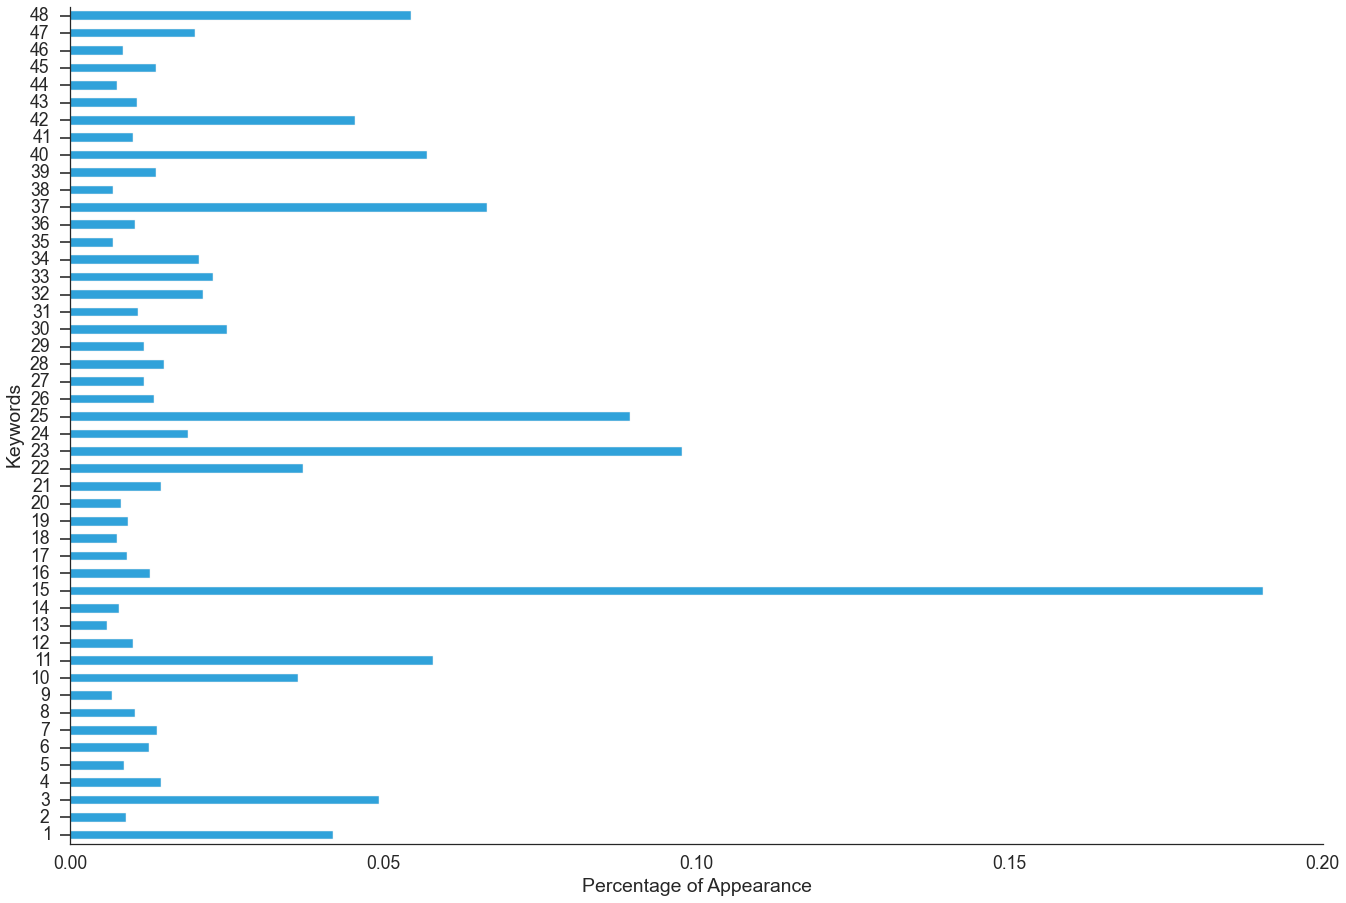

In [46]:
fig = plt.figure(figsize=(20,14))
df_keyword.groupby('Keywords').Percentage.sum().plot(kind='barh')
plt.xlabel('Percentage of Appearance')
sns.despine()
plt.show()

In [47]:
keywords_list = []
for c in train.columns:
    if c.startswith('Medical_K'):
        keywords_list.append(c)
keywords_list

['Medical_Keyword_1',
 'Medical_Keyword_2',
 'Medical_Keyword_3',
 'Medical_Keyword_4',
 'Medical_Keyword_5',
 'Medical_Keyword_6',
 'Medical_Keyword_7',
 'Medical_Keyword_8',
 'Medical_Keyword_9',
 'Medical_Keyword_10',
 'Medical_Keyword_11',
 'Medical_Keyword_12',
 'Medical_Keyword_13',
 'Medical_Keyword_14',
 'Medical_Keyword_15',
 'Medical_Keyword_16',
 'Medical_Keyword_17',
 'Medical_Keyword_18',
 'Medical_Keyword_19',
 'Medical_Keyword_20',
 'Medical_Keyword_21',
 'Medical_Keyword_22',
 'Medical_Keyword_23',
 'Medical_Keyword_24',
 'Medical_Keyword_25',
 'Medical_Keyword_26',
 'Medical_Keyword_27',
 'Medical_Keyword_28',
 'Medical_Keyword_29',
 'Medical_Keyword_30',
 'Medical_Keyword_31',
 'Medical_Keyword_32',
 'Medical_Keyword_33',
 'Medical_Keyword_34',
 'Medical_Keyword_35',
 'Medical_Keyword_36',
 'Medical_Keyword_37',
 'Medical_Keyword_38',
 'Medical_Keyword_39',
 'Medical_Keyword_40',
 'Medical_Keyword_41',
 'Medical_Keyword_42',
 'Medical_Keyword_43',
 'Medical_Keyword_44

In [48]:
keyword_subset = train[keywords_list]
keyword_subset.head()

,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
keyword_subset['Keyword_Count'] = keyword_subset.sum(axis=1)
keyword_subset.head(30)

/Users/fancyshmancy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Keyword_Count
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


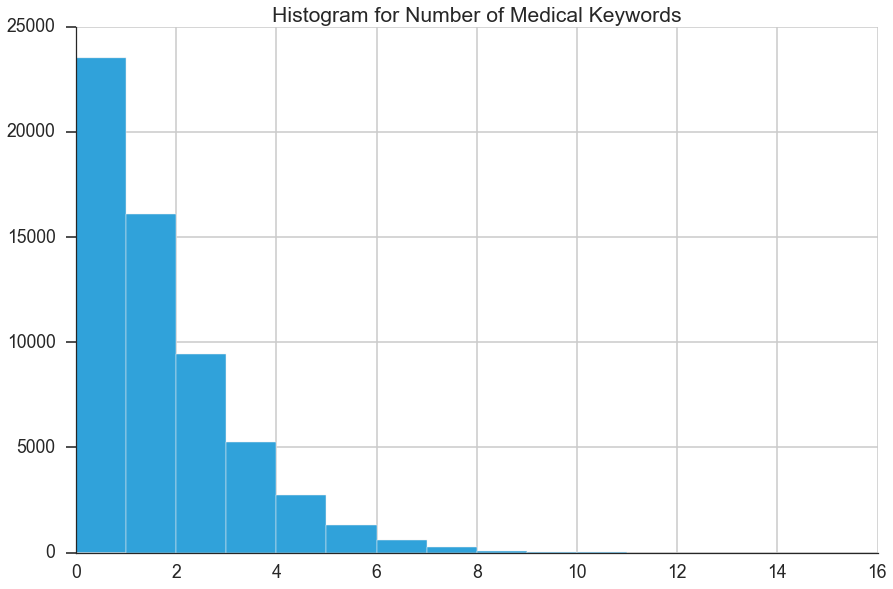

In [55]:
keyword_subset.Keyword_Count.hist(bins=16)
plt.title('Histogram for Number of Medical Keywords')
sns.despine()
plt.show()

In [52]:
keyword_subset.Keyword_Count.describe()

count    59381.000000
mean         1.264765
std          1.480236
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: Keyword_Count, dtype: float64

In [61]:
print 'Percentage of number of keywords >= 8: %.4f' % (keyword_subset[keyword_subset.Keyword_Count>=8].shape[0]/float(keyword_subset.shape[0])*100)

Percentage of number of keywords >= 8: 0.2863


### Most of the entries have only few keywords

In [64]:
just_dummies = pd.get_dummies(train['Family_Hist_1'])
just_dummies

,1,2,3
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
5,0,1,0
6,0,0,1
7,0,1,0
8,0,0,1
9,0,0,1


In [69]:
categorical = [
    'Product_Info_1',
    'Product_Info_2', 
    'Product_Info_3', 
    'Product_Info_5', 
    'Product_Info_6', 
    'Product_Info_7', 
    'Employment_Info_2', 
    'Employment_Info_3', 
    'Employment_Info_5', 
    'InsuredInfo_1', 
    'InsuredInfo_2', 
    'InsuredInfo_3', 
    'InsuredInfo_4', 
    'InsuredInfo_5', 
    'InsuredInfo_6', 
    'InsuredInfo_7', 
    'Insurance_History_1', 
    'Insurance_History_2', 
    'Insurance_History_3', 
    'Insurance_History_4', 
    'Insurance_History_7', 
    'Insurance_History_8', 
    'Insurance_History_9', 
    'Family_Hist_1', 
    'Medical_History_2', 
    'Medical_History_3', 
    'Medical_History_4', 
    'Medical_History_5', 
    'Medical_History_6', 
    'Medical_History_7', 
    'Medical_History_8', 
    'Medical_History_9', 
    'Medical_History_11', 
    'Medical_History_12', 
    'Medical_History_13', 
    'Medical_History_14', 
    'Medical_History_16', 
    'Medical_History_17', 
    'Medical_History_18', 
    'Medical_History_19', 
    'Medical_History_20', 
    'Medical_History_21', 
    'Medical_History_22', 
    'Medical_History_23', 
    'Medical_History_25', 
    'Medical_History_26', 
    'Medical_History_27', 
    'Medical_History_28', 
    'Medical_History_29', 
    'Medical_History_30', 
    'Medical_History_31', 
    'Medical_History_33', 
    'Medical_History_34', 
    'Medical_History_35', 
    'Medical_History_36', 
    'Medical_History_37', 
    'Medical_History_38', 
    'Medical_History_39', 
    'Medical_History_40', 
    'Medical_History_41'
]

categ_subset = pd.DataFrame(columns=['length'])
idx = 0
for c in categorical:
    categ_subset.loc[idx,'length'] = len(train[c].unique())
    idx += 1

In [72]:
print (categ_subset.length.unique())

[2 19 34 3 36 11 579]


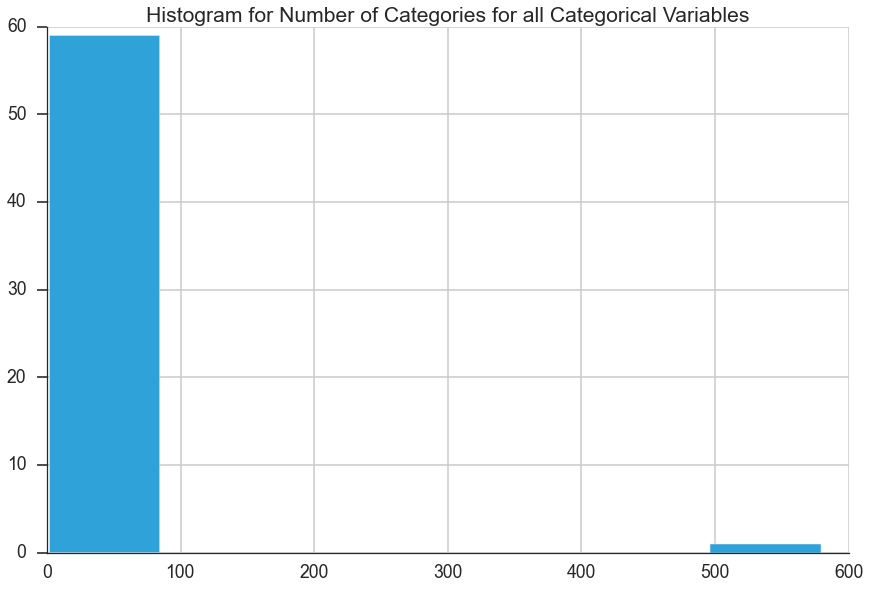

In [71]:
categ_subset.length.hist(bins=7)
plt.title('Histogram for Number of Categories for all Categorical Variables')
sns.despine()
plt.show()

In [75]:
for c in categorical:
    if (len(train[c].unique()) < 500) & (len(train[c].unique()) > 30):
        print c

Product_Info_3
Employment_Info_2


In [76]:
train.Employment_Info_2.unique()

array([12,  1,  9, 15,  3, 14, 20, 32, 11, 10, 36, 16, 37, 22,  6, 26, 27,
       13,  2,  4, 35,  7, 38, 30, 18, 29, 19, 31, 21, 23, 34, 25, 33,  5,
       28, 17])

In [77]:
unnormalized = [
    'Medical_History_1', 
    'Medical_History_10', 
    'Medical_History_15', 
    'Medical_History_24', 
    'Medical_History_32'
]

for c in unnormalized:
    print len(train[c].unique())

172
104
242
228
96
